In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

+ Diamond weight in carat - carat
+ diamond cutting quality - cut
+ diamond color from J (worst) to D (best) - color
+ A measure of diamond clarity (from left to right is worst to best: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF) - clarity
+ diamond length in mm - x
+ diamond width in mm - y
+ diamond depth in mm - z
+ Percentage depth that is equal to z / mean(x,y) - depth
+ The width of the widest point at the top of the diamond - table
+ diamond price - price

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(50000, 10)

toal 50000 rows and 10 columns are in dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [56]:
# there are no any null values in dataset

In [7]:
df.duplicated().sum()

126

In [57]:
# 126 duplicates values are present in dataset

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(49874, 10)

In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000
mean,0.799331,61.751803,57.458786,3945.384569,5.734441,5.738060,3.541028
std,0.474607,1.428207,2.231087,3996.939331,1.122340,1.144973,0.706607
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,952.000000,4.720000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2414.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5352.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
cat_cols = [col for col in df.columns if df[col].dtype == "O"]

In [14]:
cat_cols

['cut', 'color', 'clarity']

In [16]:
for col in cat_cols:
    print(df[col].value_counts())
    print('*'*10)

cut
Ideal        19881
Premium      12769
Very Good    11194
Good          4547
Fair          1483
Name: count, dtype: int64
**********
color
G    10424
E     9067
F     8844
H     7683
D     6209
I     5045
J     2602
Name: count, dtype: int64
**********
clarity
SI1     12086
VS2     11378
SI2      8483
VS1      7564
VVS2     4687
VVS1     3363
IF       1626
I1        687
Name: count, dtype: int64
**********


In [21]:
num_cols = [col for col in df.columns if (df[col].dtype != "O") & (col != 'price')]
num_cols

['carat', 'depth', 'table', 'x', 'y', 'z']

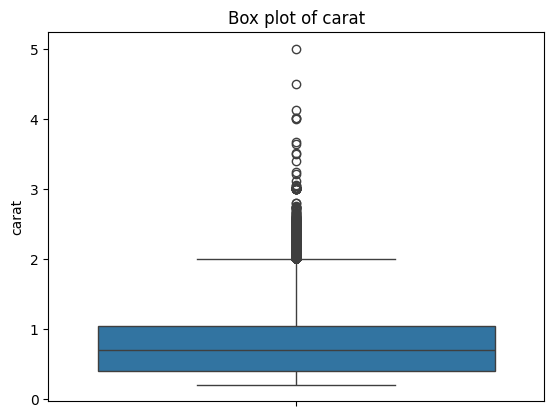

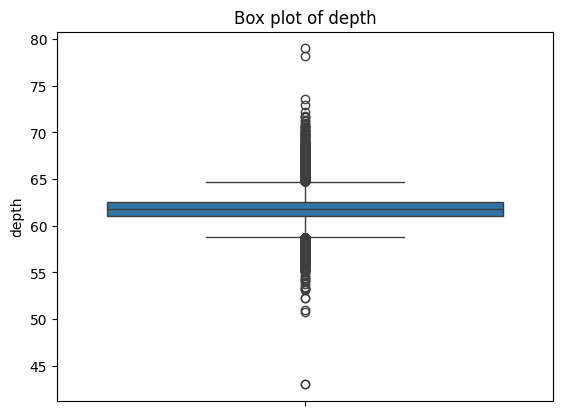

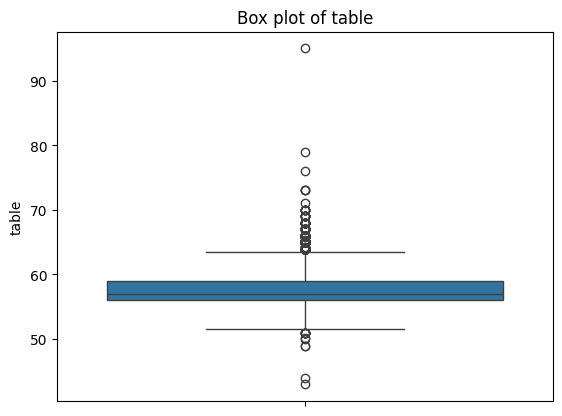

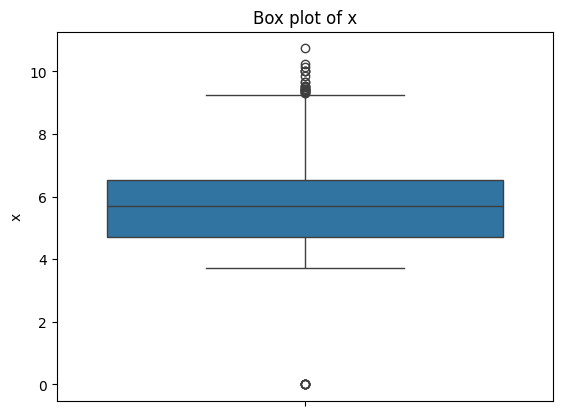

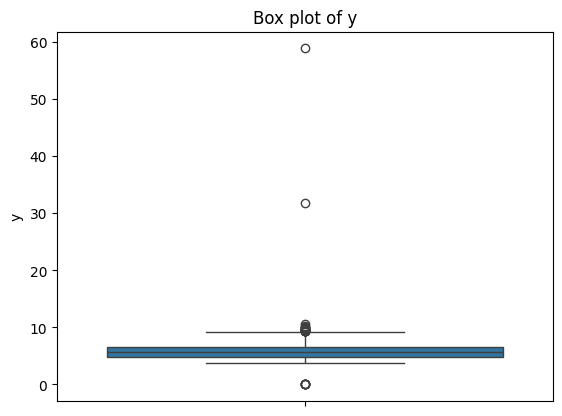

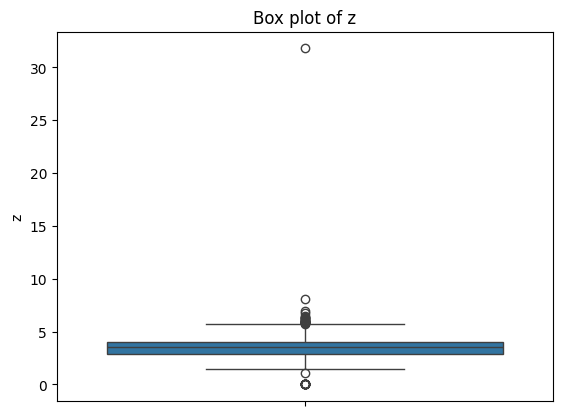

In [22]:
for col in num_cols:
    sns.boxplot(df[col])
    plt.title(f"Box plot of {col}")
    plt.show()

In [23]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outlier_percentage = (len(outliers) / len(df)) * 100
    
    print(f'Percentage of outliers in {col} column: {outlier_percentage:.2f}%')

Percentage of outliers in carat column: 3.52%
Percentage of outliers in depth column: 4.69%
Percentage of outliers in table column: 1.12%
Percentage of outliers in x column: 0.06%
Percentage of outliers in y column: 0.06%
Percentage of outliers in z column: 0.09%


In [24]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    
    df[col] = df[col].apply(lambda x: upper_fence if x > upper_fence else (lower_fence if x < lower_fence else x))

In [25]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outlier_percentage = (len(outliers) / len(df)) * 100
    
    print(f'Percentage of outliers in {col} column: {outlier_percentage:.2f}%')

Percentage of outliers in carat column: 0.00%
Percentage of outliers in depth column: 0.00%
Percentage of outliers in table column: 0.00%
Percentage of outliers in x column: 0.00%
Percentage of outliers in y column: 0.00%
Percentage of outliers in z column: 0.00%


In [58]:
# Outliers in all numerical columns are replaced by capping

In [26]:
from sklearn.preprocessing import OrdinalEncoder

In [31]:
oe = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])
df['cut'] = oe.fit_transform(df[['cut']])

In [32]:
oe = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
df['clarity'] = oe.fit_transform(df[['clarity']])

In [33]:
oe = OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']])
df['color'] = oe.fit_transform(df[['color']])

In [59]:
# oridnal encoding for color, cut and clarity columns

In [34]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4.0,5.0,1.0,61.50,55.0,326,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,59.80,61.0,326,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,58.75,63.5,327,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,62.40,58.0,334,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.30,58.0,335,4.34,4.35,2.75


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49874 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    49874 non-null  float64
 1   cut      49874 non-null  float64
 2   color    49874 non-null  float64
 3   clarity  49874 non-null  float64
 4   depth    49874 non-null  float64
 5   table    49874 non-null  float64
 6   price    49874 non-null  int64  
 7   x        49874 non-null  float64
 8   y        49874 non-null  float64
 9   z        49874 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 4.2 MB


In [37]:
X = df.drop('price', axis=1)
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4.0,5.0,1.0,61.50,55.0,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,59.80,61.0,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,58.75,63.5,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,62.40,58.0,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.30,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
49995,0.72,4.0,6.0,2.0,60.80,57.0,5.75,5.76,3.50
49996,0.72,1.0,6.0,2.0,63.10,55.0,5.69,5.75,3.61
49997,0.70,2.0,6.0,2.0,62.80,60.0,5.66,5.68,3.56
49998,0.86,3.0,2.0,1.0,61.00,58.0,6.15,6.12,3.74


In [39]:
y = df['price']
y

0         326
1         326
2         327
3         334
4         335
         ... 
49995    2757
49996    2757
49997    2757
49998    2757
49999    2757
Name: price, Length: 49874, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34911, 9) (14963, 9) (34911,) (14963,)


In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()
model

LinearRegression()

In [45]:
model.fit(X_train, y_train)

LinearRegression()

In [46]:
model.coef_

array([13477.77220318,   130.18049688,   318.52129958,   483.13059894,
         -51.15531702,   -32.35081966, -1959.74129027,   835.10925719,
       -1126.88815066])

In [47]:
model.intercept_

5766.046423007783

In [49]:
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import r2_score, mean_squared_error

In [54]:
print(f"R2: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2: 0.9145598019005905
MSE: 1364258.4523197424


In [61]:
# R2 = 0.91 indicates that the model fits the data very well, with a high proportion of variability in the 
# target variable being captured by the features.

print(f"r2 for training data: {r2_score(y_train, model.predict(X_train))}")

In [64]:
# Since both R2 scores are similar and relatively high, we can reasonably conclude that your model does not exhibit overfitting and have good accuracy.

In [65]:
from sklearn.model_selection import KFold, cross_val_score

In [66]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [67]:
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

In [68]:
print("R² scores for each fold: ", scores)
print("Mean R² score: ", np.mean(scores))
print("Standard Deviation of R² scores: ", np.std(scores))

R² scores for each fold:  [0.91427769 0.91351106 0.92055895 0.91170951 0.91704359]
Mean R² score:  0.9154201603849096
Standard Deviation of R² scores:  0.0030906794149836683


The K-Fold Cross-Validation results indicate that our model has a strong ability to predict the target variable with minimal variance in performance across different subsets of the data. The high mean R² score and low standard deviation suggest that the model is both effective and reliable, making it a solid choice for our predictions. 